## Aufgabe 1

In [ ]:
import numpy as np
import nnwplot
iris=np.loadtxt("iris.csv", delimiter=",")

In [ ]:
def ErrorRate(Y,T):
    if Y.ndim==1 or Y.shape[0]==1:
        errors=Y!=T
        return errors.sum()/Y.size
    else: # für mehrere Ausgaben in one-hot Kodierung:
        # Dies brauchen Sie jetzt noch nicht nachzuvollziehen.
        errors=Y.argmax(0)!=T.argmax(0)
        return errors.sum()/Y.shape[1]

In [ ]:
class SLN:
    def __init__(self, dIn, cOut):
        np.random.seed(42)
        self._W = np.random.randn(dIn, 1)
        self._W = self._W / np.sqrt(dIn+1)
        self._b = np.zeros((cOut,1))
    
    def neuron(self, X):
        net = (X@self._W) - self._b
        return net > 0
    
    def deltaTrain(self, X, T, eta, maxIter, maxErrorRate):
        for epoch in range(maxIter):
            Y = self.neuron(X)
            # print(Y.shape, T.shape)
            Wd = (T - Y).T
            Wd = (Wd @ X).T
            Wd = Wd * eta / X.size
            # print("shape", self._W.shape, Wd.shape)
            self._W += Wd
            #print("W:", self._W)
            #print("Wd:", Wd)
            #print(Y.T.shape)
            #print(T.T)
            error = ErrorRate(Y.T,T.T)
            #print("e:",error)
            if error < maxErrorRate:
                print("maxErrorRate reached!")
                break
        print("Training finished in epoch", epoch + 1, "with error", error)

In [ ]:
X = iris[:,:2]
T = np.array(iris[:,4], ndmin=2).T
T2 = (T > 0).astype(int)

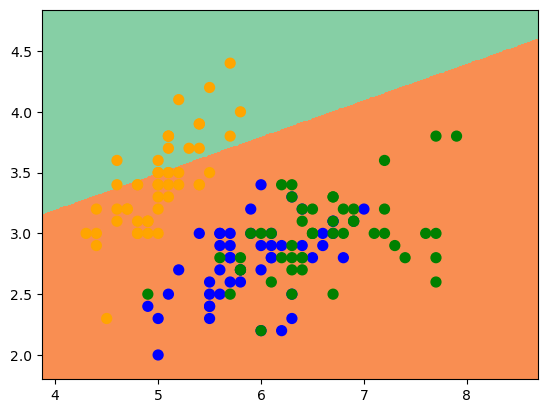

In [ ]:
slnMan = SLN(1, 1)
slnMan._W = np.array([-.3,1], ndmin=2).T
slnMan._b = np.array([2], ndmin=2)
X
nnwplot.plotTwoFeatures(X, T, slnMan.neuron)

Training finished in epoch 200000 with error 0.02


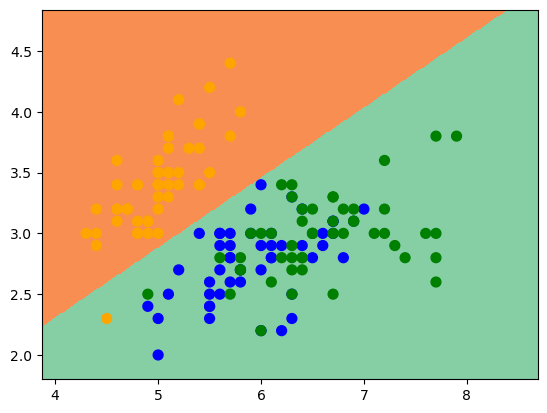

In [ ]:
sln = SLN(2,1)
sln.deltaTrain(X,T2,0.2,200000,0.005)
nnwplot.plotTwoFeatures(X, T, sln.neuron)

Training finished in epoch 20000 with error 0.02


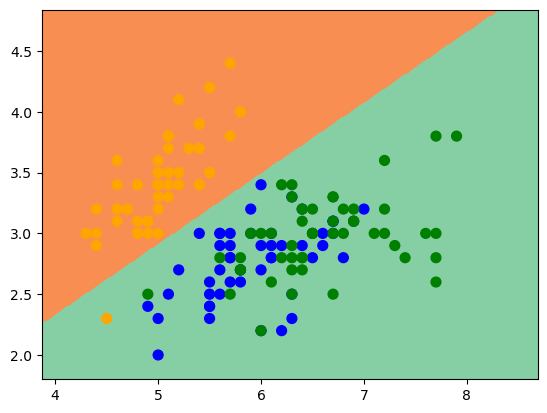

In [ ]:
sln = SLN(2,1)
sln.deltaTrain(X,T2,0.1,20000,0.005)
nnwplot.plotTwoFeatures(X, T, sln.neuron)